In [1]:
import pandas as pd
import numpy as np
import random as rnd

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [5]:
train_df = pd.read_csv('H:/IIT/SDGP/sdgptrain/train_sdgp.csv')
test_df = pd.read_csv('H:/IIT/SDGP/sdgptrain/test_sdgp.csv')
combine = [train_df, test_df]

In [6]:
print(train_df.columns.values)

['Year' 'Suicide' 'Age' 'Gender' 'Religon' 'Race' 'Occupation'
 'Civil Status' 'Education Level' 'Reason'
 'Lifetime Psychiatric Hospitalizations' 'Past Suicide Attempts'
 'Any suicidal thoughts mentioned' 'Self-Injurious Behaviour'
 'Psychiatric Disorders' 'Past Illnesses ' 'Alcohol/ drug Consumption'
 'Anger' 'Sleep Problem' 'Social Iscolation' 'Sad/ Weary' 'Humilated']


In [7]:
train_df.head()


,Year,Suicide,Age,Gender,Religon,Race,Occupation,Civil Status,Education Level,Reason,...,Any suicidal thoughts mentioned,Self-Injurious Behaviour,Psychiatric Disorders,Past Illnesses,Alcohol/ drug Consumption,Anger,Sleep Problem,Social Iscolation,Sad/ Weary,Humilated
0,2018,0,30,F,Buddhist,Sinhalese,Administrative Executive Managerial & related ...,Unmarried,From Grade 1 to 7,Asthma,...,0,0,None,Asthma,None,0,0,0,0,0
1,2018,0,91,F,Islam,Muslim,Sales worker,Married,University Degree or above,Alzheimer's disease,...,0,0,None,Other,None,0,1,0,0,0
2,2018,0,85,M,Buddhist,Sinhalese,Security Personnel,Married,University Degree or above,Stroke/Chronic diseases & Physical disabilities,...,0,0,None,Diabetes,None,0,1,0,0,0
3,2017,1,87,M,Buddhist,Sinhalese,Unemployed persons,Married,School not attended,Harrasment by the husband & family disputes,...,1,0,None,Chronic pain,Frequent,1,1,1,1,1
4,2018,0,59,F,Buddhist,Sinhalese,Pensioners,Unmarried,Other,Alzheimer's disease,...,0,0,None,COPD,None,0,1,0,1,1


In [8]:
train_df.tail()

,Year,Suicide,Age,Gender,Religon,Race,Occupation,Civil Status,Education Level,Reason,...,Any suicidal thoughts mentioned,Self-Injurious Behaviour,Psychiatric Disorders,Past Illnesses,Alcohol/ drug Consumption,Anger,Sleep Problem,Social Iscolation,Sad/ Weary,Humilated
694,2018,0,59,F,Buddhist,Sinhalese,Clerical & related workers (Stenographers/ Typ...,Married,Other,Natural Death,...,0,0,None,Kidney Disease,None,0,0,0,0,0
695,2016,1,39,M,Buddhist,Sinhalese,Agricultural Animal Husbandry Fisherman & rela...,Married,Passed G.C.E (O/L),Loss of property,...,1,0,Depression,Other,Frequent,0,0,0,1,0
696,2015,1,32,M,Buddhist,Sinhalese,Clerical & related workers (Stenographers/ Typ...,Married,Passed G.C.E (O/L),Harrasment by the husband & family disputes,...,0,1,None,Diabetes,Moderate,0,0,0,0,0
697,2018,0,76,F,Christian,Burger,Clerical & related workers (Stenographers/ Typ...,Married,University Degree or above,Ischemic heart disease,...,0,0,None,Heart Diseases,None,0,1,0,0,0
698,2015,1,22,M,Buddhist,Sinhalese,Production process workers Craftsman & related...,Unmarried,Passed G.C.E (O/L),Other Reasons,...,0,1,None,COPD,Moderate,0,0,0,1,0


In [10]:
train_df.info()
print('_'*40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 22 columns):
Year                                     699 non-null int64
Suicide                                  699 non-null int64
Age                                      699 non-null int64
Gender                                   699 non-null object
Religon                                  699 non-null object
Race                                     699 non-null object
Occupation                               699 non-null object
Civil Status                             699 non-null object
Education Level                          699 non-null object
Reason                                   699 non-null object
Lifetime Psychiatric Hospitalizations    699 non-null int64
Past Suicide Attempts                    699 non-null int64
Any suicidal thoughts mentioned          699 non-null int64
Self-Injurious Behaviour                 699 non-null int64
Psychiatric Disorders                    699 non

In [11]:
train_df.describe()

,Year,Suicide,Age,Lifetime Psychiatric Hospitalizations,Past Suicide Attempts,Any suicidal thoughts mentioned,Self-Injurious Behaviour,Anger,Sleep Problem,Social Iscolation,Sad/ Weary,Humilated
count,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.00000,699.000000,699.000000,699.000000,699.000000
mean,2017.307582,0.502146,55.005722,0.194564,0.203147,0.296137,0.217454,0.32618,0.606581,0.353362,0.371960,0.264664
std,1.021874,0.500353,22.474053,0.396148,0.402629,0.456879,0.412809,0.46915,0.488858,0.478356,0.483674,0.441470
min,2015.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,2017.000000,0.000000,36.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
50%,2018.000000,1.000000,57.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000,0.000000
75%,2018.000000,1.000000,73.000000,0.000000,0.000000,1.000000,0.000000,1.00000,1.000000,1.000000,1.000000,1.000000
max,2018.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000


In [12]:
train_df.describe(include=['O'])

,Gender,Religon,Race,Occupation,Civil Status,Education Level,Reason,Psychiatric Disorders,Past Illnesses,Alcohol/ drug Consumption
count,699,699,699,699,699,699,699,699,699,699
unique,2,5,5,15,4,7,25,8,11,3
top,M,Buddhist,Sinhalese,Unemployed persons,Married,Passed Grade 8,Natural Death,None,Other,None
freq,407,425,445,164,313,164,123,482,158,492


In [16]:
train_df[['Gender', 'Suicide']].groupby(['Gender'], as_index=False).mean().sort_values(by='Suicide', ascending=False)

,Gender,Suicide
1,M,0.724816
0,F,0.191781


In [19]:
train_df[['Race', 'Suicide']].groupby(['Race'], as_index=False).mean().sort_values(by='Suicide', ascending=False)

,Race,Suicide
3,Sinhalese,0.752809
4,Tamil,0.168539
1,Muslim,0.033333
0,Burger,0.000000
2,Other,0.000000


In [20]:
train_df[['Occupation', 'Suicide']].groupby(['Occupation'], as_index=False).mean().sort_values(by='Suicide', ascending=False)

,Occupation,Suicide
14,professional Technical & related workers (Doct...,1.000000
12,Unemployed persons,0.878049
1,Agricultural Animal Husbandry Fisherman & rela...,0.871795
10,Service workers (Cooks/Tailors/Barbers/ etc),0.676471
11,Student,0.653846
13,Workers not classfied by occupation,0.633333
7,Professional Technical & related workers (Doct...,0.578947
6,Production process workers Craftsman & related...,0.540541
8,Sales worker,0.270270
2,Armed Services,0.225806


In [21]:
train_df[['Civil Status', 'Suicide']].groupby(['Civil Status'], as_index=False).mean().sort_values(by='Suicide', ascending=False)

,Civil Status,Suicide
1,Married,0.766773
2,Unmarried,0.497696
3,Widow,0.020202
0,Divourced,0.014286


In [22]:
train_df[['Education Level', 'Suicide']].groupby(['Education Level'], as_index=False).mean().sort_values(by='Suicide', ascending=False)

,Education Level,Suicide
3,Passed G.C.E (O/L),0.755556
4,Passed Grade 8,0.737805
0,From Grade 1 to 7,0.652174
5,School not attended,0.283019
1,Other,0.150943
2,Passed G.C.E (A/L),0.148148
6,University Degree or above,0.040000


In [23]:
train_df[['Reason', 'Suicide']].groupby(['Reason'], as_index=False).mean().sort_values(by='Suicide', ascending=False)

,Reason,Suicide
12,Ill-treatment by the children,1.000000
10,Failure at the examination,1.000000
20,REASON NOT MENTIONED,1.000000
19,Problems caused with the elders,1.000000
4,Chronic diseases & Physical disabilities,1.000000
15,Loss of property,1.000000
1,Aggrieved over the death parents/relations,1.000000
8,Economic problems (Poverty indebtedness),1.000000
9,Employment problems,1.000000
11,Harrasment by the husband & family disputes,0.985915


In [24]:
train_df[['Lifetime Psychiatric Hospitalizations', 'Suicide']].groupby(['Lifetime Psychiatric Hospitalizations'], as_index=False).mean().sort_values(by='Suicide', ascending=False)

,Lifetime Psychiatric Hospitalizations,Suicide
1,1,0.882353
0,0,0.410302


In [25]:
train_df[['Past Suicide Attempts', 'Suicide']].groupby(['Past Suicide Attempts'], as_index=False).mean().sort_values(by='Suicide', ascending=False)

,Past Suicide Attempts,Suicide
0,0,0.517056
1,1,0.443662


In [26]:
train_df[['Any suicidal thoughts mentioned', 'Suicide']].groupby(['Any suicidal thoughts mentioned'], as_index=False).mean().sort_values(by='Suicide', ascending=False)

,Any suicidal thoughts mentioned,Suicide
1,1,0.840580
0,0,0.359756


In [27]:
train_df[['Self-Injurious Behaviour', 'Suicide']].groupby(['Self-Injurious Behaviour'], as_index=False).mean().sort_values(by='Suicide', ascending=False)

,Self-Injurious Behaviour,Suicide
1,1,0.868421
0,0,0.400366


In [28]:
train_df[['Psychiatric Disorders', 'Suicide']].groupby(['Psychiatric Disorders'], as_index=False).mean().sort_values(by='Suicide', ascending=False)

,Psychiatric Disorders,Suicide
5,Other,1.000000
2,Depression,0.936937
1,Bipolar Disorder,0.882353
4,Other,0.823529
6,PTSD,0.818182
0,BPD,0.733333
7,Schizophrenia,0.705882
3,None,0.334025


In [30]:
train_df[['Past Illnesses ', 'Suicide']].groupby(['Past Illnesses '], as_index=False).mean().sort_values(by='Suicide', ascending=False)

,Past Illnesses,Suicide
2,Cancer,1.000000
5,HIV/AIDS,0.928571
8,Other,0.746835
1,COPD,0.611111
3,Chronic pain,0.543478
10,none,0.537879
4,Diabetes,0.533333
7,Kidney Disease,0.447368
6,Heart Diseases,0.340426
0,Asthma,0.212121


In [31]:
train_df[['Alcohol/ drug Consumption', 'Suicide']].groupby(['Alcohol/ drug Consumption'], as_index=False).mean().sort_values(by='Suicide', ascending=False)

,Alcohol/ drug Consumption,Suicide
1,Moderate,0.869565
0,Frequent,0.843478
2,None,0.353659


In [32]:
train_df[['Anger', 'Suicide']].groupby(['Anger'], as_index=False).mean().sort_values(by='Suicide', ascending=False)

,Anger,Suicide
1,1,0.811404
0,0,0.352442


In [33]:
train_df[['Sleep Problem', 'Suicide']].groupby(['Sleep Problem'], as_index=False).mean().sort_values(by='Suicide', ascending=False)

,Sleep Problem,Suicide
1,1,0.674528
0,0,0.236364


In [34]:
train_df[['Social Iscolation', 'Suicide']].groupby(['Social Iscolation'], as_index=False).mean().sort_values(by='Suicide', ascending=False)

,Social Iscolation,Suicide
1,1,0.821862
0,0,0.327434


In [35]:
train_df[['Sad/ Weary', 'Suicide']].groupby(['Sad/ Weary'], as_index=False).mean().sort_values(by='Suicide', ascending=False)

,Sad/ Weary,Suicide
1,1,0.900000
0,0,0.266515


In [36]:
train_df[['Humilated', 'Suicide']].groupby(['Humilated'], as_index=False).mean().sort_values(by='Suicide', ascending=False)

,Humilated,Suicide
1,1,0.881081
0,0,0.365759


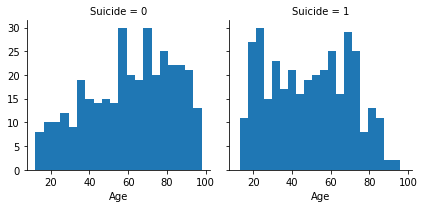

In [37]:
gr = sns.FacetGrid(train_df, col='Suicide')
gr.map(plt.hist, 'Age', bins=20)

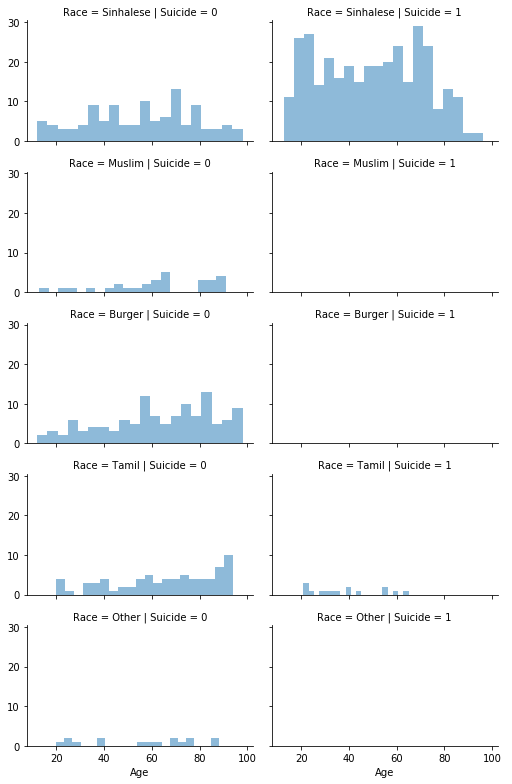

In [38]:
grid = sns.FacetGrid(train_df, col='Suicide', row='Race', height=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

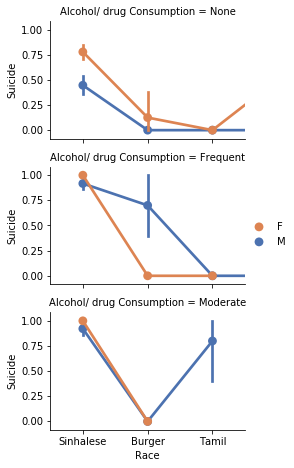

In [43]:
grid = sns.FacetGrid(train_df, row='Alcohol/ drug Consumption', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Race', 'Suicide', 'Gender', palette='deep')
grid.add_legend()

In [44]:
print("Before", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape)

train_df = train_df.drop(['Occupation', 'Education Level'], axis=1)
test_df = test_df.drop(['Occupation', 'Education Level'], axis=1)
combine = [train_df, test_df]

"After", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape

Before (699, 22) (301, 21) (699, 22) (301, 21)


('After', (699, 20), (301, 19), (699, 20), (301, 19))

In [45]:
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train_df['Title'], train_df['Gender'])

AttributeError: 'DataFrame' object has no attribute 'Name'